# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a>, який зберегли наприкінці попередньої роботи (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. Дослідити ознаки, побудувавши їх візуалізації
2. Порахувати кореляцію між всіма кількісними ознаками
3. Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. Візуально оцініть наявність та силу зв'язку між цими ознаками.   
4. Які кількісні ознаки можуть бути предикторами кількості викидів СО2?
5. Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити ознаки, побудувавши їх візуалізації</p>
</div>


Зчитую дані з файлу у датафрейм

In [1]:
import pandas as pd

df = pd.read_csv("../Data2-clean.csv", sep=';' ,encoding='cp1252')
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0,17.048902
3,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0,164.427660
4,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0,23.111786
...,...,...,...,...,...,...,...
178,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0,22.182281
179,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0,280.091671
180,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0,52.245796
181,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0,22.045136


In [3]:
df.dtypes

Country Name           object
Region                 object
GDP per capita        float64
Population            float64
CO2 emission          float64
Area                  float64
Population density    float64
dtype: object

Будую графіки

C:\Users\local_gud2i5y\AppData\Local\Temp\ipykernel_11860\2488088977.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_index].set_xticklabels(labels, rotation=45, ha='right')
C:\Users\local_gud2i5y\AppData\Local\Temp\ipykernel_11860\2488088977.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_index].set_xticklabels(labels, rotation=45, ha='right')
C:\Users\local_gud2i5y\AppData\Local\Temp\ipykernel_11860\2488088977.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_index].set_xticklabels(labels, rotation=45, ha='right')
C:\Users\local_gud2i5y\AppData\Local\Temp\ipykernel_11860\2488088977.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

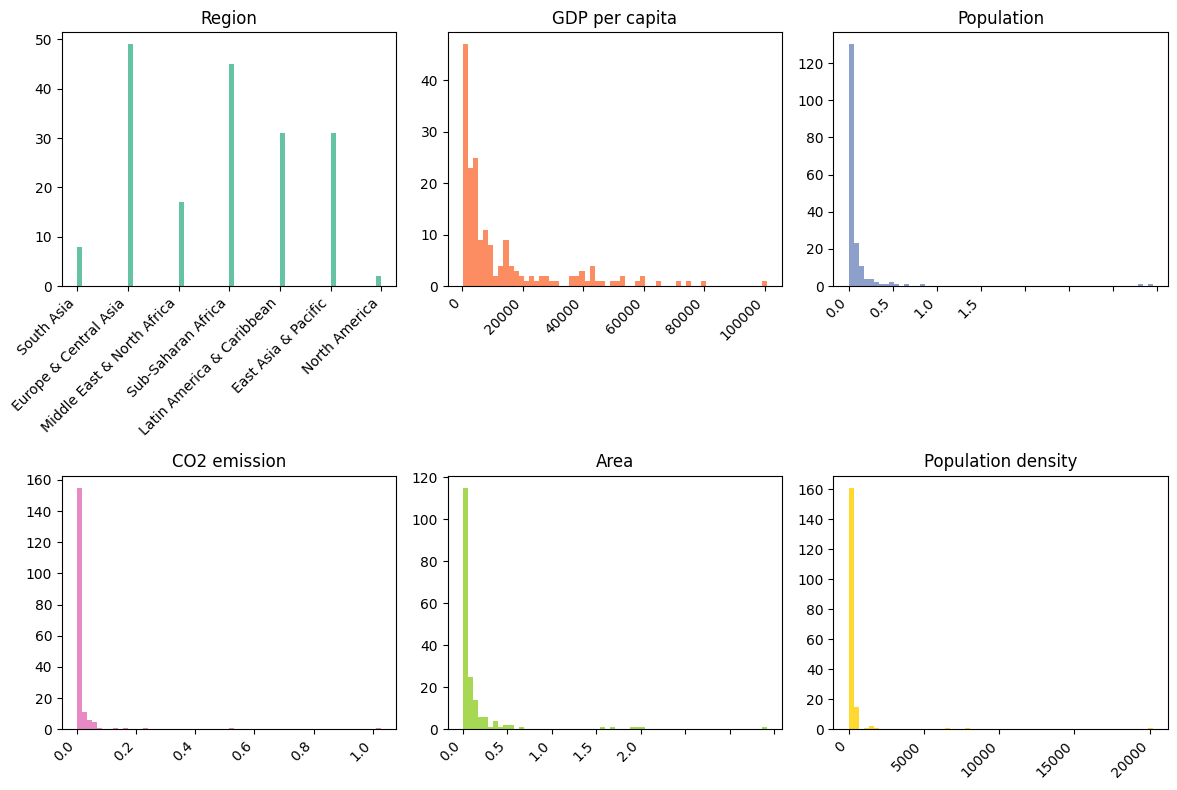

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
clrs = sns.color_palette("Set2", 7)

for i, col in enumerate(df.columns[1:]):
    row = i // 3
    col_index = i % 3
    axes[row, col_index].hist(df[col], bins=60, color=clrs[i])
    axes[row, col_index].set_title(col)
    labels = axes[row, col_index].get_xticklabels()
    axes[row, col_index].set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()

<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Порахувати кореляцію між всіма кількісними ознаками</p>
</div>


Рахую кореляцію між всіма кількісними ознаками

<Axes: >

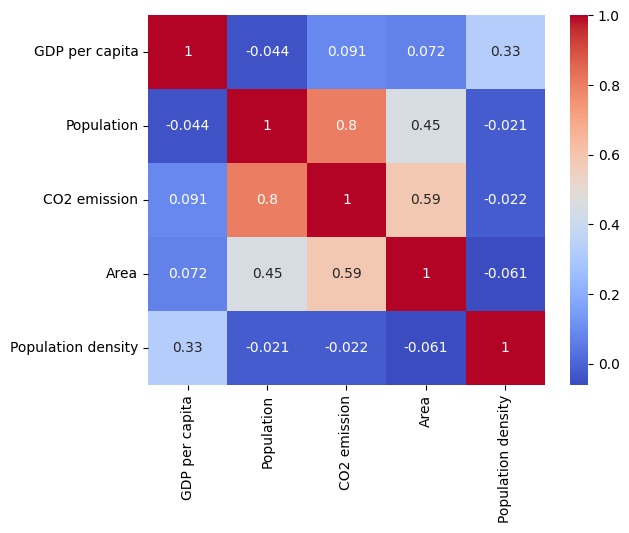

In [5]:
df_numeric = df.select_dtypes(include=['float64'])

correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудувати діаграми розсіювання для кількісних ознак та 'CO2 emission'. Побудувати діаграму розмаху для 'CO2 emission' по регіонам. </p>
<p>Візуально оцініть наявність та силу зв'язку між цими ознаками.</p>
</div>


Будую діаграму розсіювання для кількісних ознак та `CO2 emission`

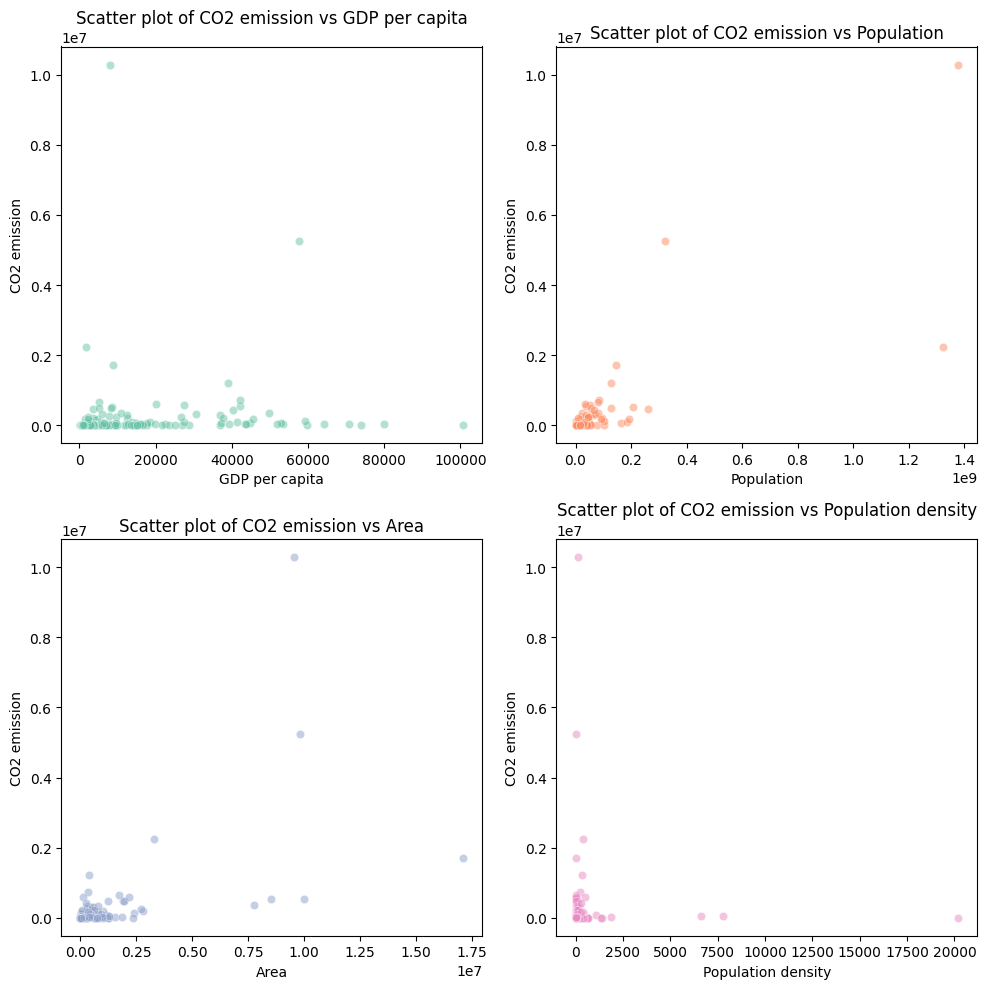

In [6]:
quantitative_columns = ['GDP per capita', 'Population', 'Area', 'Population density']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, col in enumerate(quantitative_columns):
    row = i // 2
    col_index = i % 2
    sns.scatterplot(data=df, x=col, y='CO2 emission', color=clrs[i], alpha=0.5, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Scatter plot of CO2 emission vs {col}')

plt.tight_layout()

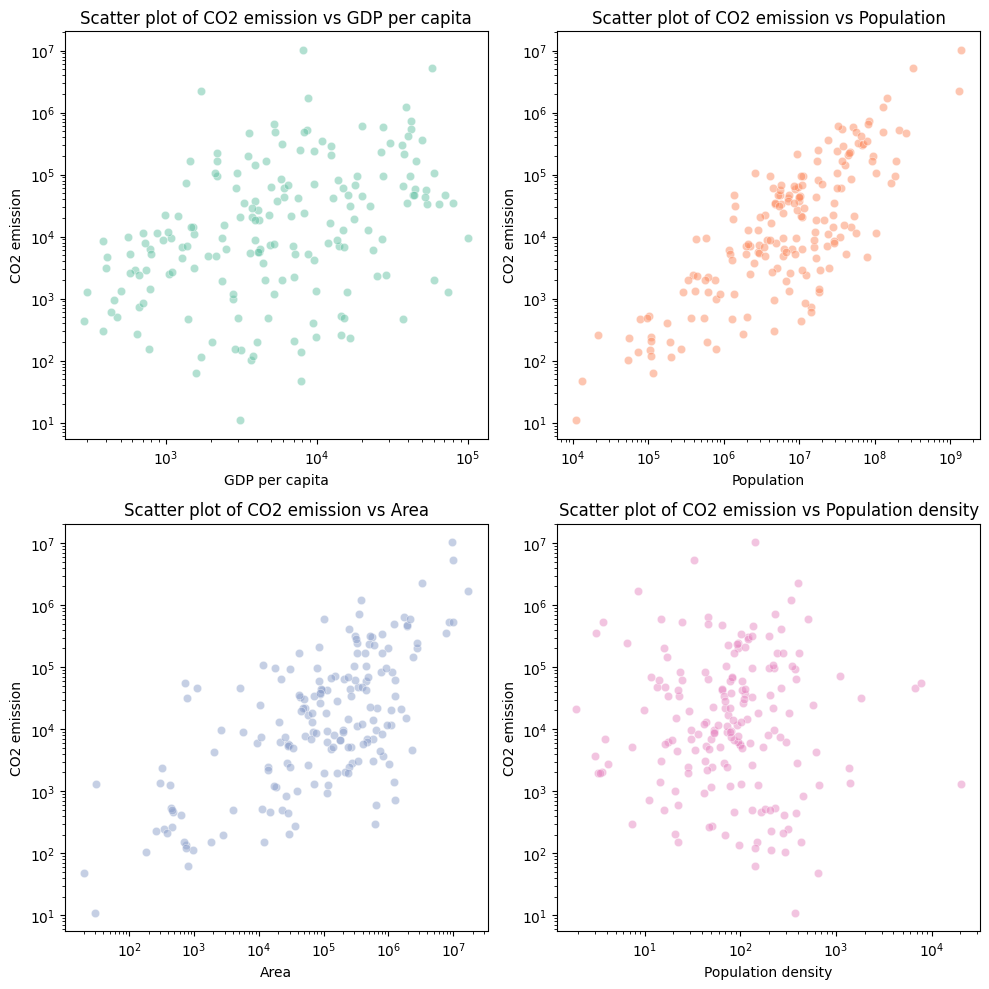

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, col in enumerate(quantitative_columns):
    row = i // 2
    col_index = i % 2
    sns.scatterplot(data=df, x=col, y='CO2 emission', color=clrs[i], alpha=0.5, ax=axes[row, col_index])
    axes[row, col_index].set(xscale="log", yscale="log")
    axes[row, col_index].set_title(f'Scatter plot of CO2 emission vs {col}')

plt.tight_layout()


Будую діаграму розмаху для `CO2 emission` по регіонам

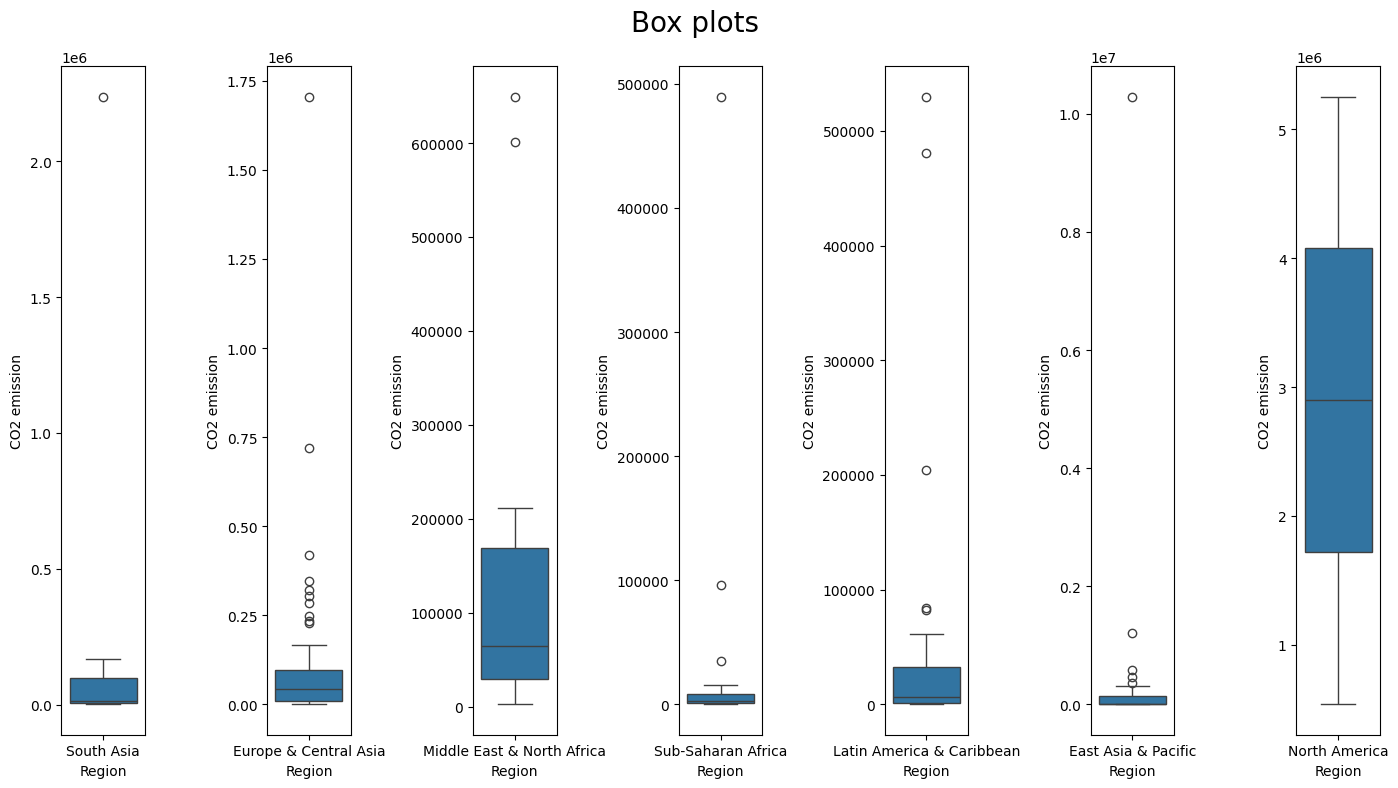

In [8]:
regions = df['Region'].unique()

fig, axes = plt.subplots(1, ncols=len(regions), figsize=(2*len(regions), 8))
fig.suptitle('Box plots', fontsize=20)

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    sns.boxplot(ax=axes[i], data=region_data, x='Region', y='CO2 emission')

plt.tight_layout()

<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Які кількісні ознаки можуть бути предикторами кількості викидів СО2?</p>
</div>


Обчислюю коефіцієнт кореляції Пірсона та P-value для всіх кількісних змінних та `CO2 emission`

In [9]:
import scipy.stats
from termcolor import colored

quantitative_columns = ['GDP per capita', 'Population', 'Area', 'Population density']

for col in quantitative_columns:
    correlation_coefficient, p_value = scipy.stats.pearsonr(df[col], df['CO2 emission'])

    # Green for significant, yellow for non-significant
    p_value_color = 'green' if p_value < 0.05 else 'yellow'

    print(f"For {colored(col, 'blue')} and CO2 emission:")
    print(f"\tThe Pearson correlation coefficient is {correlation_coefficient}")
    print(f"\tThe P-value is {colored(p_value, p_value_color)}")
    print()


For GDP per capita and CO2 emission:
	The Pearson correlation coefficient is 0.0913637432897542
	The P-value is 0.21867791078062213

For Population and CO2 emission:
	The Pearson correlation coefficient is 0.8030020569760477
	The P-value is 1.523799314848454e-42

For Area and CO2 emission:
	The Pearson correlation coefficient is 0.5870512066109349
	The P-value is 2.4632499671008433e-18

For Population density and CO2 emission:
	The Pearson correlation coefficient is -0.022018057694006544
	The P-value is 0.7673448766598259



<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконати дисперсійний аналіз для кількості викидів СО2, згрупувати дані по регіонам</p>
</div>


Групую дані, щоб побачити чи впливає `Region` на `CO2 emission`.

In [10]:
region_co2_mean = df.groupby('Region')['CO2 emission'].mean()
region_co2_mean


Region
East Asia & Pacific           4.502644e+05
Europe & Central Asia         1.272658e+05
Latin America & Caribbean     5.363957e+04
Middle East & North Africa    1.471921e+05
North America                 2.895736e+06
South Asia                    3.145543e+05
Sub-Saharan Africa            1.804637e+04
Name: CO2 emission, dtype: float64

Скористаюсь функцією <code>f_oneway</code> з модуля "stats" для отримання F-test score та P-value.

In [11]:
regions = df['Region'].unique()
data = [df[df['Region'] == region]['CO2 emission'] for region in regions]

f_value, p_value = scipy.stats.f_oneway(*data)
p_value_color = 'green' if p_value < 0.05 else 'yellow'

print(f"\tThe F-test score: {f_value}")
print(f"\tThe P-value is {colored(p_value, p_value_color)}")


	The F-test score: 4.559032591227754
	The P-value is 0.0002520786181145583


Результат із **4.559032591227754** показником тесту, який показує  високу варіацію між групами у порівнянні з варіацією всередині групи, і P-value **0.0002520786181145583** , що вказує на дуже низьку ймовірність отримати такі або ще більш екстримальні значення. Але чи означає це, що досліджувані групи статистично значущо корелюють між собою?

Розглянемо їх окремо.

Text(0.5, 1.0, 'Boxplot of CO2 emission')

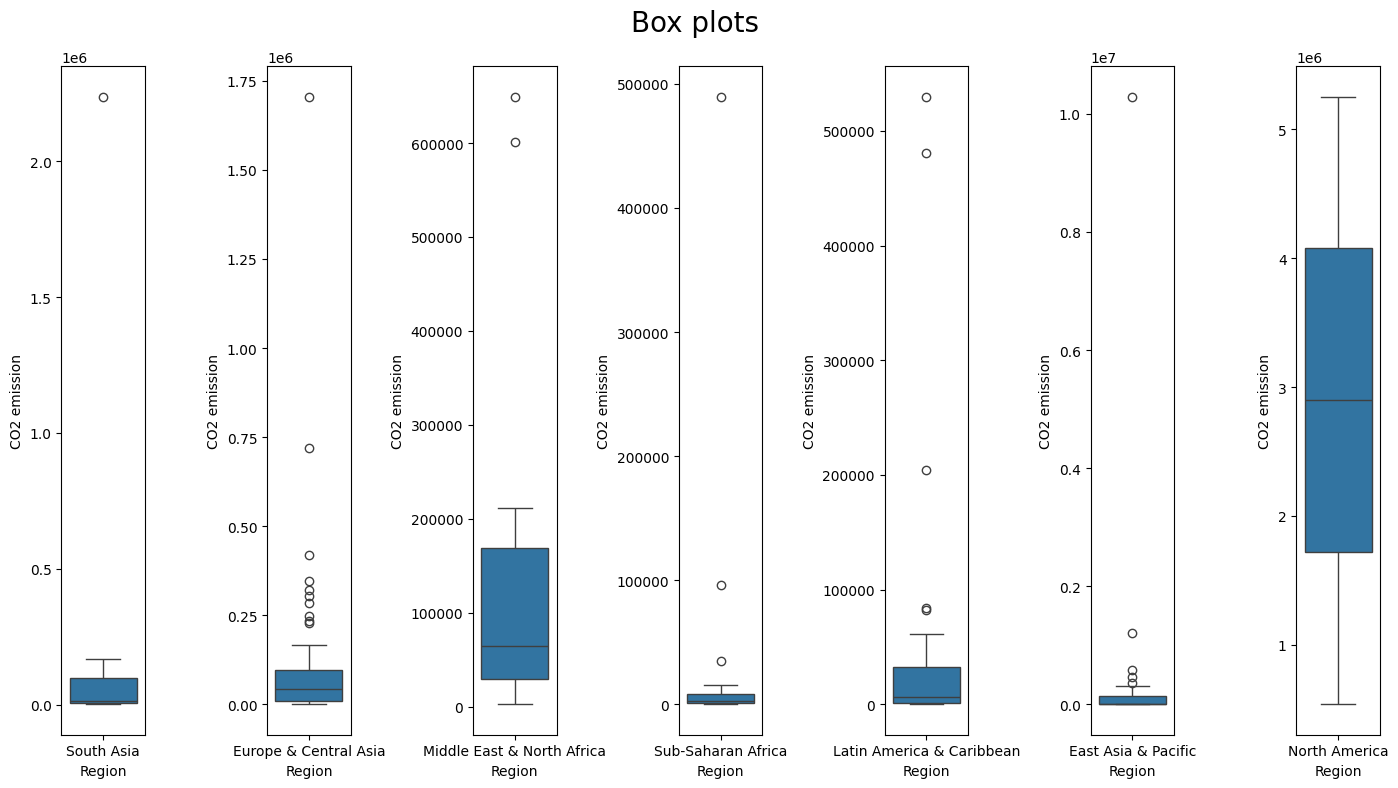

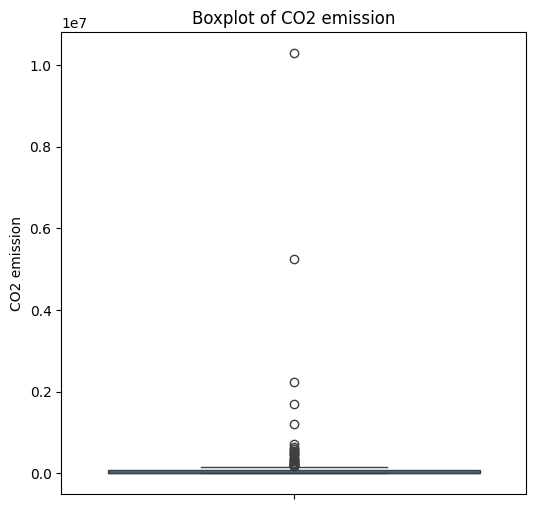

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

regions = df['Region'].unique()

fig, axes = plt.subplots(1, ncols=len(regions), figsize=(2*len(regions), 8))
fig.suptitle('Box plots', fontsize=20)

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    sns.boxplot(ax=axes[i], data=region_data, x='Region', y='CO2 emission')

plt.tight_layout()

plt.figure(figsize=(6, 6))
sns.boxplot(y='CO2 emission', data=df)
plt.title('Boxplot of CO2 emission')

Отже, на основі цих результатів, ми можемо зробити висновок, що `CO2 emission` статистично значущо корелює з `Region`.

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. По результатам дисперсійного аналізу для кількості викидів СО2 по регіонам, вкажіть пару регіонів, що відрізняються найсильніше.
2. Створіть якісну ознаку 'Rich country', згрупувавши дані 'GDP per capita' в кілька категорій (багаті-бідні країни, 3-5 категорій). Побудуйте діаграму розмаху для 'CO2 emission' по категоріям 'Rich country'. Візуально оцініть наявність зв'язку між цими ознаками.
3. Виконайте дисперсійний аналіз для 'CO2 emission', згрупувавши дані по категоріям 'Rich country'.

<details><summary>Натисніть тут, щоб побачити підказку</summary>

Групування кількісної змінної в категорії було в попередній лабораторній роботі. Використайте функцію "cut"
</details>

1. Регіони з найбільшою кількістю викідів CO2 та найменшою.

In [13]:
print(f"The most different regions: {region_co2_mean.idxmax()} та { region_co2_mean.idxmin()}")

The most different regions: North America та Sub-Saharan Africa


2. Створення якісної ознаки `Rich country`. Створення діаграми розмаху для `CO2 emission` за цією категорією.

Text(0.5, 1.0, 'Boxplot of CO2 emission for each Category of Rich country')

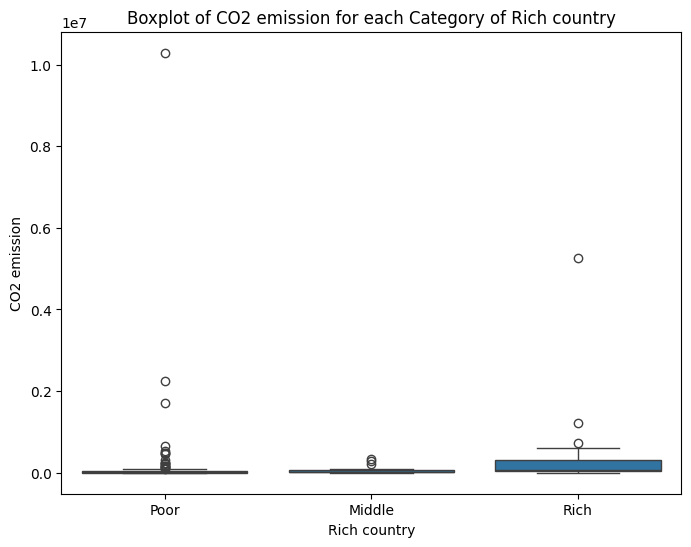

In [16]:
import numpy as np

df['Rich country'] = pd.cut(df['GDP per capita'], bins=[0, 10000, 20000, np.inf], labels=['Poor', 'Middle', 'Rich'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='Rich country', y='CO2 emission', data=df)
plt.title('Boxplot of CO2 emission for each Category of Rich country')

3. Дисперсійний аналіз для `CO2 emission`, згрупованих по категоріям `Rich country`.

In [17]:
categories = df['Rich country'].unique()
data = [df[df['Rich country'] == category]['CO2 emission'].dropna() for category in categories]

f_value, p_value = scipy.stats.f_oneway(*data)
p_value_color = 'green' if p_value < 0.05 else 'yellow'

print(f"\tThe F-test score: {f_value}")
print(f"\tThe P-value is {colored(p_value, p_value_color)}")


	The F-test score: 0.6882720195506884
	The P-value is 0.5037608679303966


<h2>Виконав студент групи ІП-24 <br> Піддубний Борис</h2>